<font size=6  color= 'blue' > <b>[LEPL1507] - PROJET P4</b> <br>
<br><br>
Airson Alexis<br>
Beniffou Ibrahim <br>
Henneaux Lucas <br>
Lemaire Antoine <br>
Smith Marielle <br>
Canon Théo<br>
<div style="text-align: right"> </div>

<br><br>
</font>


In [11]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.utils import to_categorical 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

In [12]:
#preprocessing of ppm dataset 
path_training = 'BelgiumTSC_Training\Training'
path_testing = 'BelgiumTSC_Testing\Testing'
nbr_class = 62
batch_size = 32

train_datagen = ImageDataGenerator( rescale =1./255, zoom_range = 0.2, horizontal_flip = True)
training_set = train_datagen.flow_from_directory(path_training,target_size = (30, 30),
batch_size = 32,class_mode = 'binary', color_mode='rgb')

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(path_testing,
target_size = (30, 30),batch_size = 32, class_mode = 'binary')

Found 4575 images belonging to 62 classes.
Found 2520 images belonging to 62 classes.


training_set = ensemble de 143 tuples
Chaque tuple représente 32 images (sauf le dernier, 31 images)

tuple[0] = features = tableau (32, 30, 30, 3)
tuple[1] = label = tableau (32)

plt.imshow(training_set[i][0][j]) affiche l'image n°j du paquet d'image n°i 

In [13]:
'''
On met toutes les données du Training Set dans un numpy array
'''

X_train = []
y_train = []

for i in range(len(training_set)):
    for j in range(len(training_set[i][0])) :
        X_train.append(training_set[i][0][j])
        y_train.append(training_set[i][1][j])

X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

In [ ]:
'''
On met toutes les données du Test Set dans un numpy array
'''

X_test = []
y_test = []

for i in range(len(test_set)):
    for j in range(len(test_set[i][0])) :
        X_test.append(test_set[i][0][j])
        y_test.append(test_set[i][1][j])

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_test.shape)
print(y_test.shape)

(2520, 30, 30, 3)
(2520,)


In [ ]:
y_train = to_categorical(y_train, nbr_class)
y_test = to_categorical(y_test, nbr_class)

In [ ]:
'''
On construit le modèle de prédiction sur base de la méthode CNN
'''

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(nbr_class, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [ ]:
'''
On entraîne le modèle de prédiction
'''

eps = 15
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]
anc = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=eps, callbacks=mycallbacks)

Epoch 1/15
143/143 [==============================] - 20s 114ms/step - loss: 3.3562 - accuracy: 0.1980 - val_loss: 2.0472 - val_accuracy: 0.4956
Epoch 2/15
143/143 [==============================] - 17s 116ms/step - loss: 1.7853 - accuracy: 0.5591 - val_loss: 1.0346 - val_accuracy: 0.7183
Epoch 3/15
143/143 [==============================] - 14s 95ms/step - loss: 1.0988 - accuracy: 0.7012 - val_loss: 0.7366 - val_accuracy: 0.7611
Epoch 4/15
143/143 [==============================] - 18s 128ms/step - loss: 0.8519 - accuracy: 0.7661 - val_loss: 0.4943 - val_accuracy: 0.8579
Epoch 5/15
143/143 [==============================] - 12s 85ms/step - loss: 0.6749 - accuracy: 0.8028 - val_loss: 0.3905 - val_accuracy: 0.8817
Epoch 6/15
143/143 [==============================] - 12s 82ms/step - loss: 0.5548 - accuracy: 0.8437 - val_loss: 0.3342 - val_accuracy: 0.9171
Epoch 7/15
143/143 [==============================] - 14s 97ms/step - loss: 0.4672 - accuracy: 0.8625 - val_loss: 0.2879 - val_accura

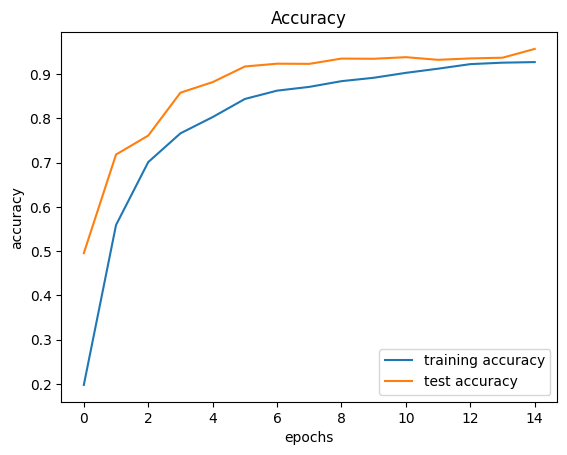

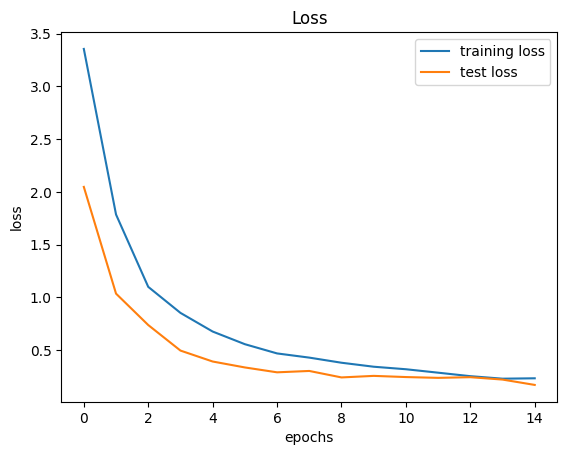

In [ ]:
'''
On plot les résultats de performances
'''

plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='test accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='test loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

A partir d'un ensemble de feature X_predict :

pred = model.predict_classes(X_predict)
print(accuracy_score(y_predict, pred))

class RandomBlueTint(keras_cv.layers.BaseImageAugmentationLayer):
    def augment_image(self, image, transformation=None):
        # image is of shape (height, width, channels)
        [*others, blue] = tf.unstack(image, axis=-1)
        blue = tf.clip_by_value(blue + 100, 0.0, 255.0)
        return tf.stack([*others, blue], axis=-1)


layer = RandomBlueTint()
augmented = layer(elephants)   #ici le elephant c'était juste l'exemple d'internet 
imshow(augmented.numpy())